In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def norm(x):
    min_max_scaler=MinMaxScaler()
    X_scaled=min_max_scaler.fit_transform(x)
    return X_scaled

def gradient_descent(alpha, x,y,norma,max_iter=1500):
    if(norma==True):
        x = norm(x.reshape(-1,1))
        y = norm(y.reshape(-1,1))
    theta = np.random.rand(x.shape[1]+1,1)
    temp = np.ones(len(x))
    y = np.array(y)
    x = np.vstack((temp.T,x.T)).T
    y = y.reshape(len(y),1)
    for i in range(max_iter):
        costval = cost(x,theta,y)
        theta[0]= theta[0]-alpha*costval[0]
        theta[1] = theta[1]-alpha*costval[1]
    return theta

def cost(x,theta,y):
    temp1 = (np.dot(x,theta)-y).reshape(1,len(x[:,0]))
    cost = []
    for p in range(len(theta)):
        tempx = x[:,p]
        temp2 = np.dot(temp1,tempx)
        tempsum = temp2.sum()
        cost.append(tempsum/(2*len(y)))
    return np.array(cost)

np.set_printoptions(suppress=True)
data = pd.read_csv('petrol_consumption.csv')
X = data.values[:,:4]
y = data.values[:,4]
X = norm(X)
y = norm(y.reshape(-1,1))
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
theta = gradient_descent(0.001, X_train, y_train,False)
temp = np.ones(len(X_test))
X_test = np.vstack((temp.T, X_test.T))
y_pred = np.dot(X_test.T, theta)
mse = (1/(len(X_test))) * np.square(y_pred-y_test).sum()
print("Mean squared error",mse)


Mean squared error 0.48578609286082064


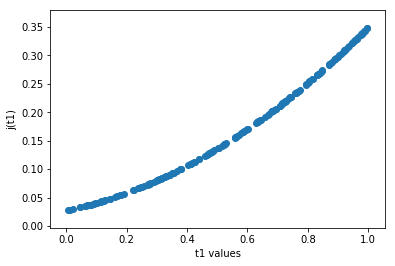

In [9]:
import warnings
warnings.filterwarnings("ignore")
t0 = 0.5
t1_values = np.random.rand(200,1)
np.sort(t1_values)
data = pd.read_csv('petrol_consumption.csv')
x = data['Petrol_tax'].values
y = data['Petrol_Consumption'].values
def cost(x,theta,y, norma=False):
    temp = np.ones(len(x))
    y = np.array(y)
    if norma:
        x = norm(x.reshape(-1,1))
        y = norm(y.reshape(-1,1))
    x = np.vstack((temp.reshape(1,len(temp)),x.T)).T
    theta = np.array(theta).reshape(-1,1)
    temp1 = np.square(np.dot(x,theta)-y).reshape(1,len(y))
    tempx = x[:,1]
    temp2 = np.dot(temp1,tempx)
    cost = temp2/(len(2*y))
    return cost
j=[]
for t1 in t1_values:
    j.append(cost(x,[t0,t1],y,True))
plt.scatter(t1_values,j)
plt.xlabel("t1 values")
plt.ylabel("j(t1)")
plt.show()